Word embeddings or word vectors represent each word numerically so that the vector matches how that word is used or what it means. Vector encodings are learned by considering the context in which the words appear.

Words that appear in similar contexts will have similar vectors. For example, the vectors for **leopard**, **lion** and **tiger** will be close to each other, while they will be far from **planet** and **castle**.

### Word Embeddings in Action

Even cooler, the relationships between words can be examined with math operations. Subtracting the vectors for **male** and **female** will return another vector. If we add that to the vector for **king**, the result is close to the vector for **queen**.

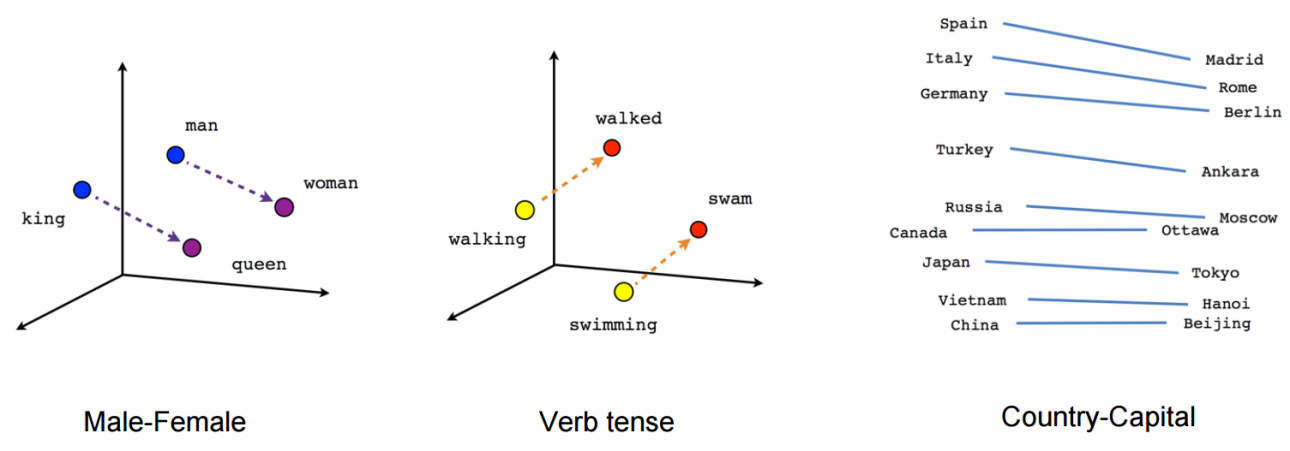

These vectors can be used as features for machine learning models. Word embeddings will generally improve the performance of our models above encoding a bag of words. `spaCy` provides incorporations learned from a template called `Word2Vec`. We can access it by loading a large language model like `en_core_web_lg`. Then they will be available on the tokens of the vector attribute.

In [1]:
# !python -m spacy download en_core_web_lg 

In [5]:
import numpy as np
import spacy


# Need to load the large model to get the vectors

nlp = spacy.load('en_core_web_lg')

These are vectors of 300 dimensions, with a vector for each word. However, we only have document-level tags and our templates will not be able to use word-level embeds. So you need a vector representation for the whole document.

In [6]:
# Disabling other pipes because we don't need them and it'll speed up this part a bit
text = "These vectors can be used as features for machine learning models."

In [7]:
with nlp.disable_pipes():
    vectors = np.array([token.vector for token in  nlp(text)])

In [8]:
vectors.shape

(12, 300)

There are many ways to combine all the word embeddings into a single document vector that we can use for training the model. A simple and surprisingly efficient approach is to simply average the vectors for each word in the document. Then we can use these document vectors for modelling.

`spaCy` calculates the average document vector we can get with doc.vector. Here is an example of loading spam data and converting it to document vectors. The dataset I am using here can be downloaded from here.

In [10]:
import pandas as pd

# Loading the spam data
# ham is the label for non-spam messages
spam = pd.read_csv('spam.csv')

In [11]:
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in spam.text])
    
doc_vectors.shape

(5572, 300)

### Classification Models for Word Embeddings
With document vectors, we can train scikit-learn models, xgboost models, or any other standard approach to modelling.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(doc_vectors, spam.label,
                                                    test_size=0.1, random_state=1)

Here is an example using Support Vector Machines (SVM). Scikit-learn provides an SVM LinearSVC classifier. It works the same as other scikit-learn models.

In [13]:
from sklearn.svm import LinearSVC

# Set dual=False to speed up training, and it's not needed
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
print(f"Accuracy: {svc.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 97.312%


### Document Similarity
Documents with similar content usually have similar vectors. So we can find similar documents by measuring the similarity between vectors. A common metric for this is cosine similarity which measures the angle between two vectors, a and b.

In [14]:
def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))

In [15]:
a = nlp("REPLY NOW FOR FREE TEA").vector
b = nlp("According to legend, Emperor Shen Nung discovered tea when leaves from a wild tree blew into his pot of boiling water.").vector

In [16]:
cosine_similarity(a, b)

0.7030031